# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [5]:
# Carga dos dados
credit = pd.read_csv('credit.csv',sep=';',decimal=',')
credit.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [6]:
# Verificando se há algo a ser alterado
credit.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
sexo_M                                      int64
posse_de_veiculo_Y                          int64
posse_de_imovel_Y                           int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64
educacao_Secondary / secondary special      int64


In [9]:
# Separando os dados do target
y = credit['mau']
x = credit.drop('mau', axis=1)

In [14]:
# Reazlizando a divisão entre treino e teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [12]:
# 1) 
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [15]:
# 2) 
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(random_state=100)

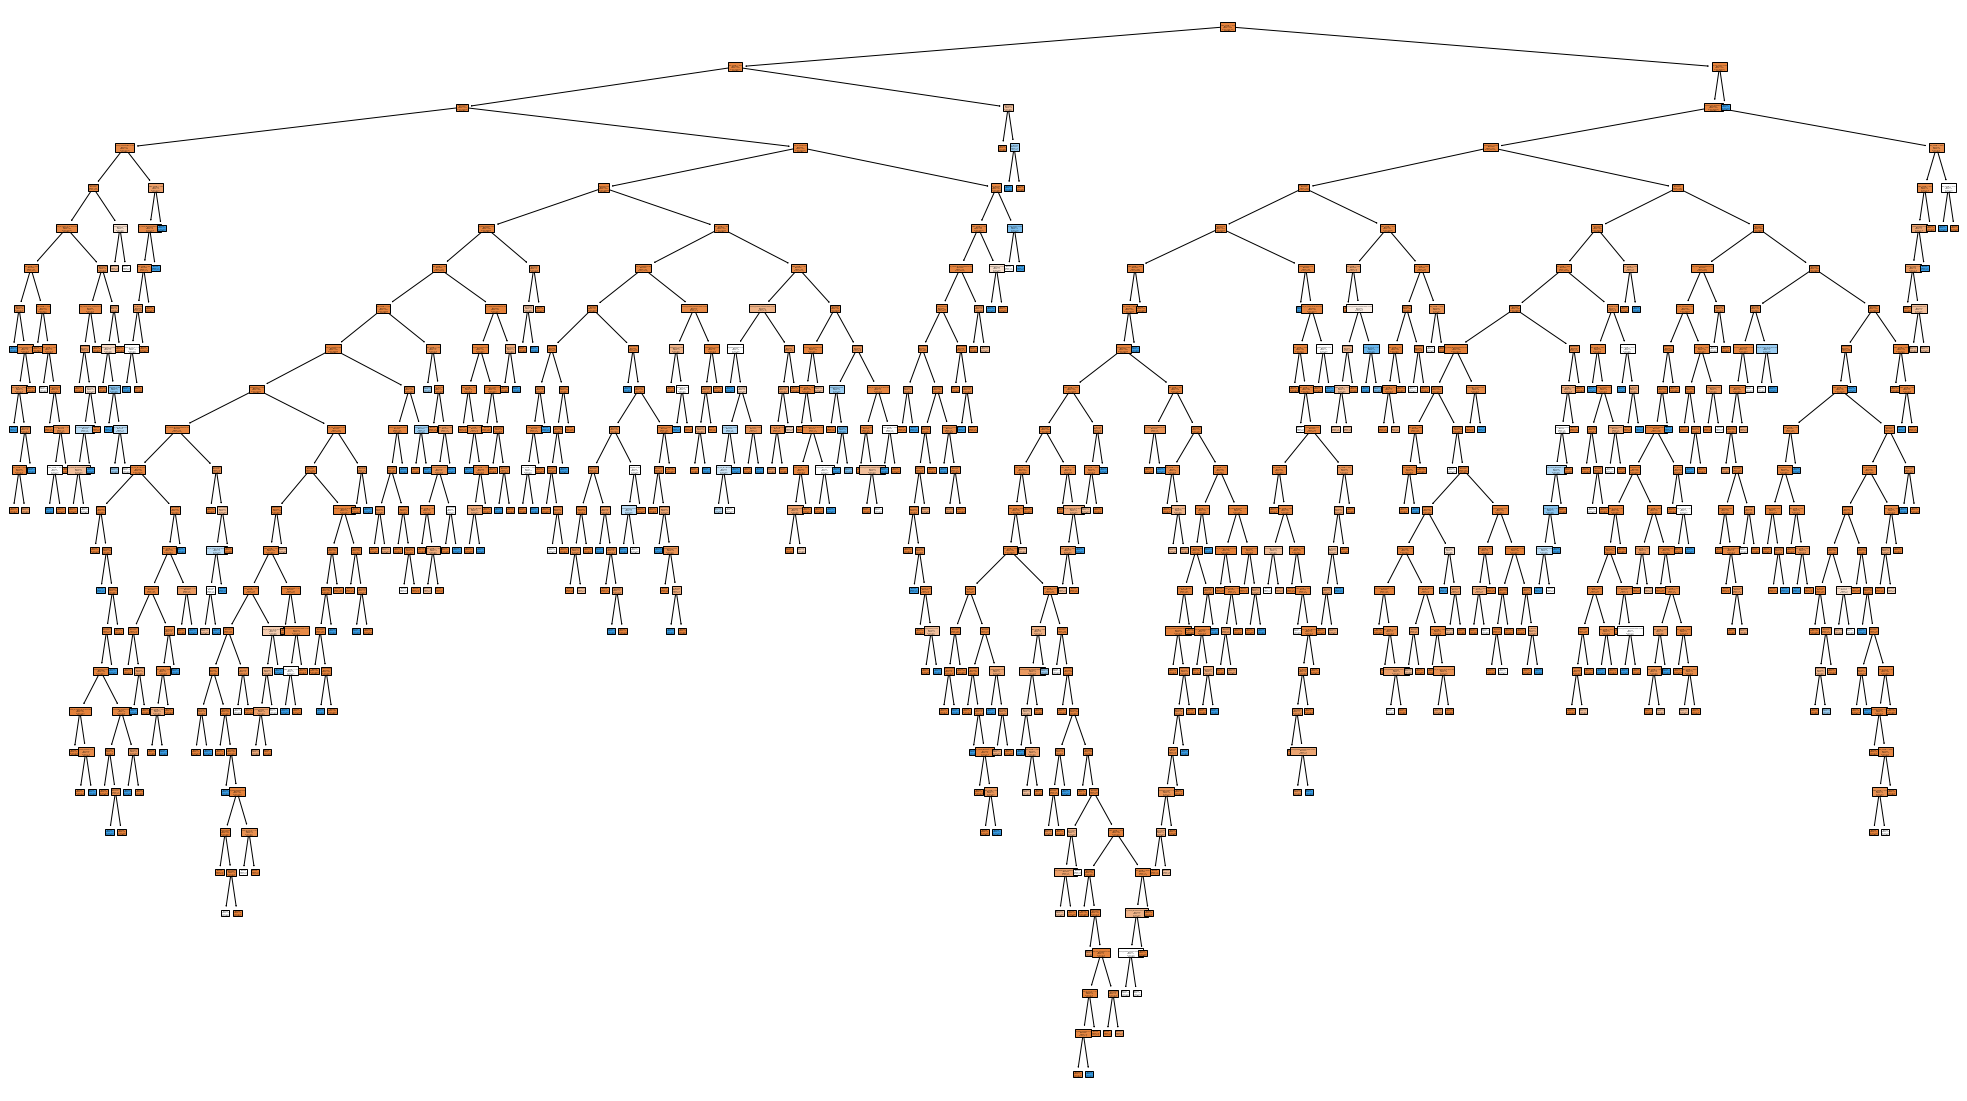

In [18]:
# 3)
plt.figure(figsize=(35, 20))
plot_tree(clf,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=x.columns);

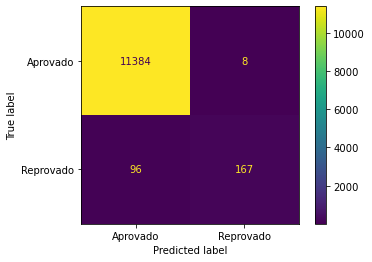

In [29]:
# 4)
plot_confusion_matrix(clf, x_train, y_train, display_labels=['Aprovado', 'Reprovado']);

In [35]:
# 5)
predict = clf.predict(x_train)
score_treino = accuracy_score(y_train, predict)
score_treino

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [41]:
# 1)
predict_test = clf.predict(x_test)
predict_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

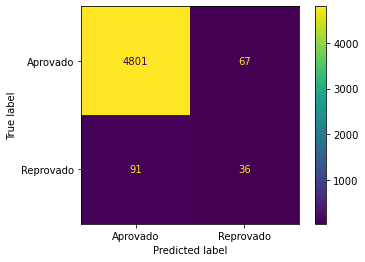

In [34]:
# 2)
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Aprovado', 'Reprovado']);

In [39]:
# 3)
score_test = accuracy_score(y_test, predict_test)
print(f'Acurácia do Treino: {score_treino*100:.2f}%')
print(f'Acurácia do Teste: {score_test*100:.2f}%')
# Por terem acurácias tão altas, talvez haja overfitting na árvore treinada

Acurácia do Treino: 99.11%
Acurácia do Teste: 96.84%


In [42]:
# 4)
# Definindo a árvore já podada
clf_podada = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf_podada

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [43]:
# Treinando a árvore
clf_podada = clf_podada.fit(x_train, y_train)
clf_podada

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

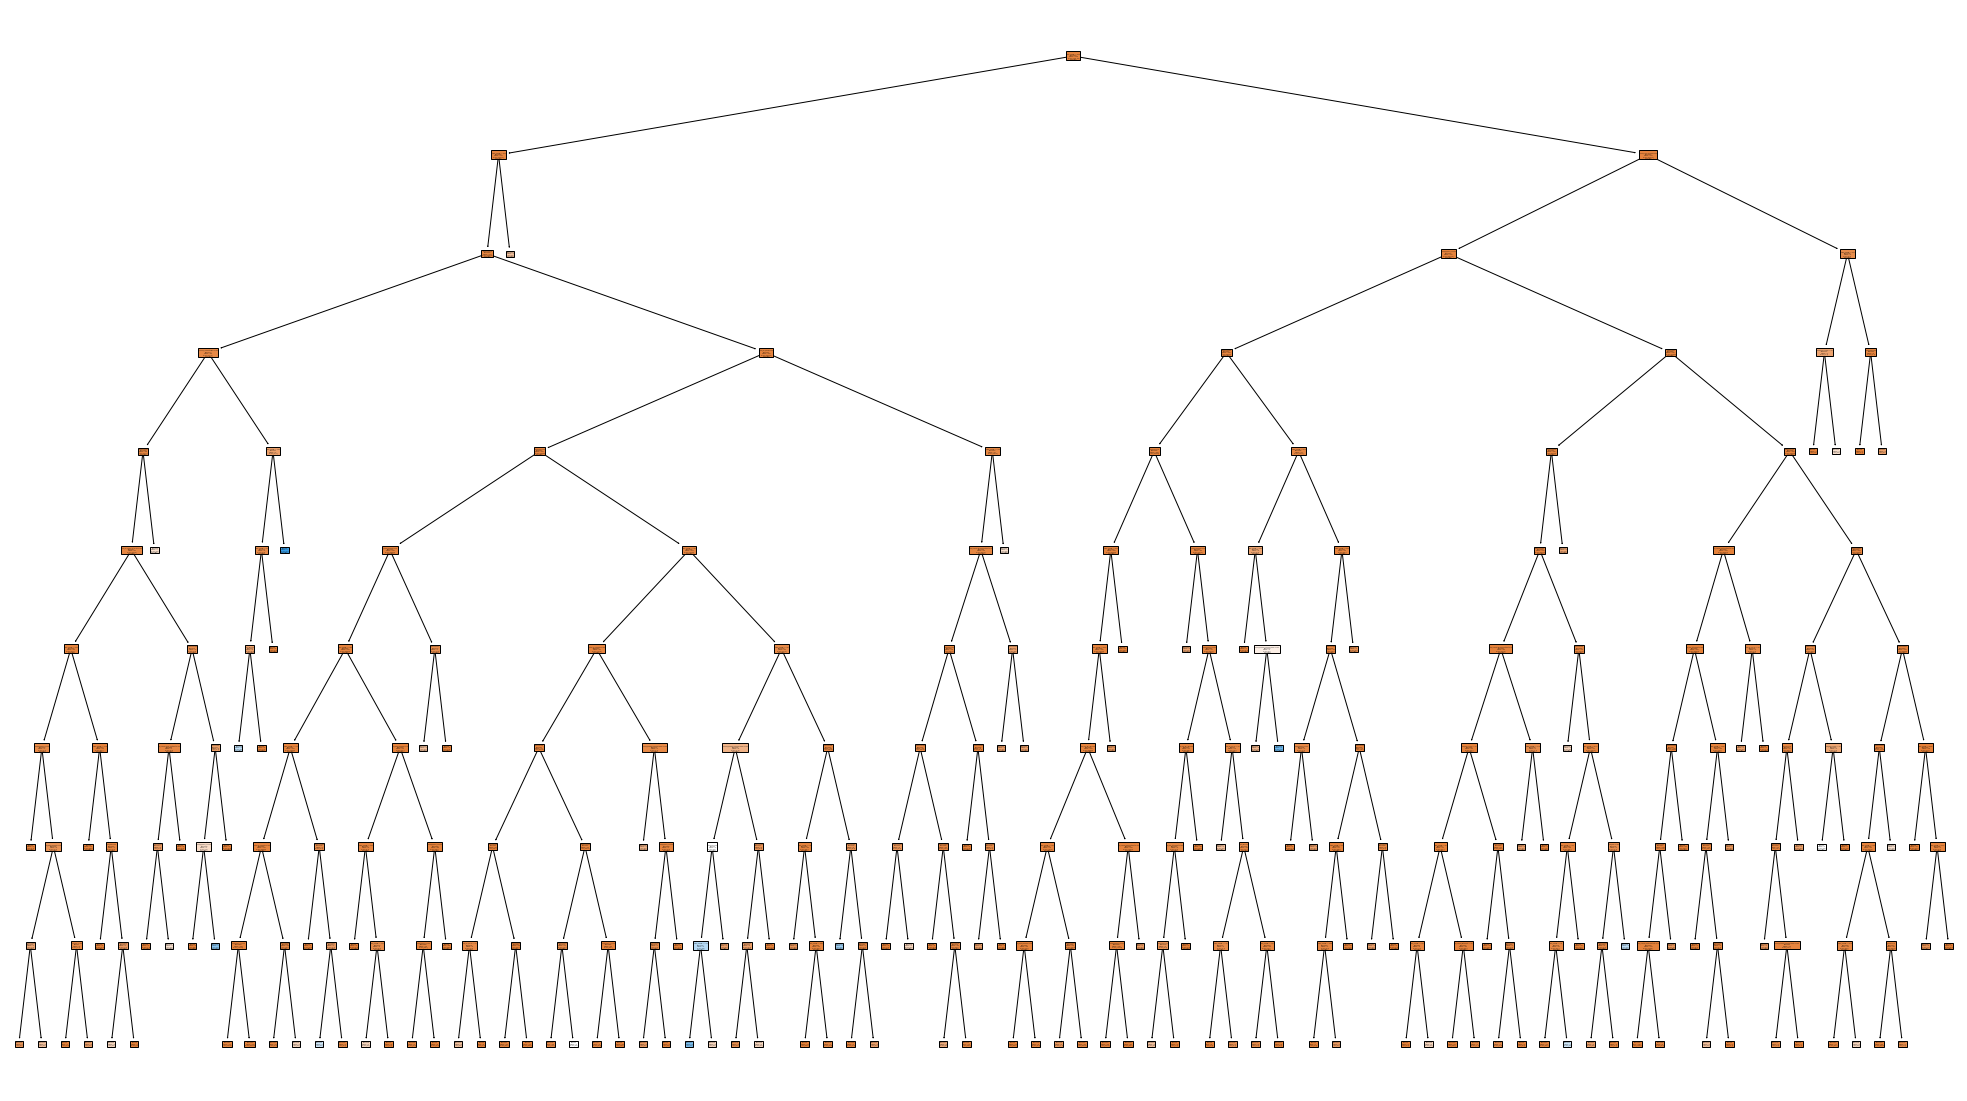

In [44]:
# Plot do modelo treinado
plt.figure(figsize=(35, 20))
plot_tree(clf_podada,
          filled=True,
          class_names=['Bom', 'Mau'],
          feature_names=x.columns);

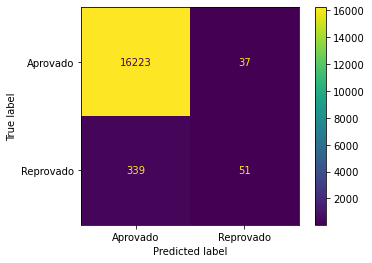

In [45]:
# Matriz Confusão
plot_confusion_matrix(clf_podada, x, y, display_labels=['Aprovado', 'Reprovado']);

In [47]:
16223 + 37 + 339 + 51

16650

In [49]:
# Proporção de proponentes como 'Maus'
prop_maus = 88 / 16650
print(f'Proporção de proponentes como "Maus": {prop_maus*100:.2f}%')

Proporção de proponentes como "Maus": 0.53%


In [51]:
# 5)
acuracia_bons =(16223 + 37)/16650
print(f'Acurácia, considerando todos os contratos como "Bons": {acuracia_bons*100:.2f}%')

Acurácia, considerando todos os contratos como "Bons": 97.66%
